<a href="https://colab.research.google.com/github/CristianAyala/infovis/blob/main/TP_FINAL_AYALA_COCA_NETFLIX_ITBA_VISUALIZACION_DE_LA_INFORMACION_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.itba.edu.ar/wp-content/uploads/2021/08/ITBA-logo.png" width="200">

<h1><center>Maestría en Management & Analytics</center></h1>
<h2><center>TP: Visualización de la información</center></h2>
<h1><center>Netflix (TOP 10 de Peliculas y Series) Argentina, Uruguay, Paraguay y Bolivia</center></h1>
<h2><center>Alumnos: Ayala Cristian / Coca Ivan</center></h2>

In [21]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial de los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Cargar el dataset
df = pd.read_csv('netflix.csv',encoding='latin-1')

# Diccionario de datos del dataset
data_dictionary = {
    "country_name": "Nombre del país donde se recopila el ranking (ej., Uruguay, Argentina)",
    "country_iso2": "Código ISO de 2 letras para el país (ej., UY, AR)",
    "week": "Fecha de la semana del ranking en formato AAAA-MM-DD",
    "category": "Tipo de contenido: Films o Series",
    "weekly_rank": "Posición en el top 10 durante esa semana (1 a 10, donde 1 es la más alta)",
    "show_title": "Título de la película o serie",
    "season_title": "Título de la temporada (aplicable solo a series, en otros casos es N/A)",
    "cumulative_weeks_in_top_10": "Número total de semanas acumuladas en el top 10 para cada título"
}

print("Diccionario de Datos:")
for key, value in data_dictionary.items():
    print(f"{key}: {value}")

Diccionario de Datos:
country_name: Nombre del país donde se recopila el ranking (ej., Uruguay, Argentina)
country_iso2: Código ISO de 2 letras para el país (ej., UY, AR)
week: Fecha de la semana del ranking en formato AAAA-MM-DD
category: Tipo de contenido: Films o Series
weekly_rank: Posición en el top 10 durante esa semana (1 a 10, donde 1 es la más alta)
show_title: Título de la película o serie
season_title: Título de la temporada (aplicable solo a series, en otros casos es N/A)
cumulative_weeks_in_top_10: Número total de semanas acumuladas en el top 10 para cada título


In [22]:
# Vista rápida del dataset
print("Vista previa de los datos:")
print(df.head())

print("\nInformación general del dataset:")
print(df.info())

Vista previa de los datos:
  country_name country_iso2        week category  weekly_rank   show_title  \
0      Uruguay           UY  2024-11-03    Films            1   Don't Move   
1      Uruguay           UY  2024-11-03    Films            2     Time Cut   
2      Uruguay           UY  2024-11-03    Films            3       Let Go   
3      Uruguay           UY  2024-11-03    Films            4  Family Pack   
4      Uruguay           UY  2024-11-03    Films            5   Hijack '93   

  season_title  cumulative_weeks_in_top_10  
0          NaN                           2  
1          NaN                           1  
2          NaN                           1  
3          NaN                           2  
4          NaN                           1  

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      ---

In [6]:
# Revisar valores únicos y estadísticos básicos
print("\nValores únicos por columna:")
print(df.nunique())

print("\nEstadísticas descriptivas:")
print(df.describe())




Valores únicos por columna:
country_name                     5
country_iso2                     5
week                           175
category                         2
weekly_rank                     10
show_title                    1701
season_title                   685
cumulative_weeks_in_top_10     100
dtype: int64

Estadísticas descriptivas:
        weekly_rank  cumulative_weeks_in_top_10
count  17500.000000                17500.000000
mean       5.500000                    4.397771
std        2.872363                    9.068452
min        1.000000                    1.000000
25%        3.000000                    1.000000
50%        5.500000                    2.000000
75%        8.000000                    3.000000
max       10.000000                  100.000000


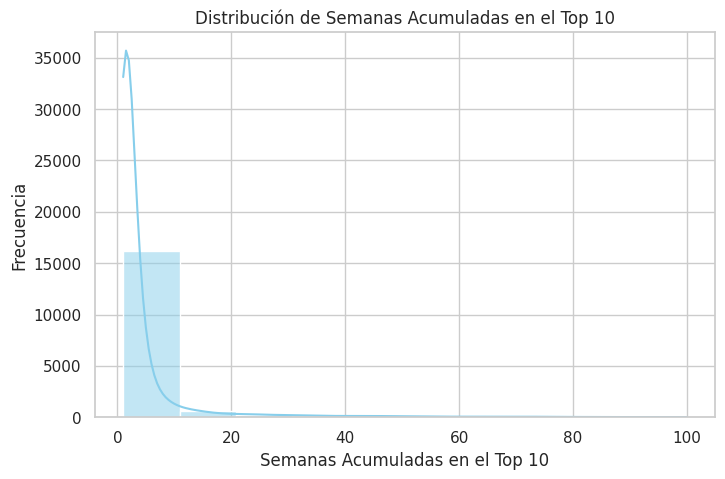

In [13]:
# Histograma para cumulative_weeks_in_top_10 Este histograma muestra la distribución de las semanas acumuladas en el top 10 para cada título.
plt.figure(figsize=(8, 5))
sns.histplot(df['cumulative_weeks_in_top_10'], bins=10, kde=True, color='skyblue')
plt.title('Distribución de Semanas Acumuladas en el Top 10')
plt.xlabel('Semanas Acumuladas en el Top 10')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-15-009544c1da4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country_name', y='cumulative_weeks_in_top_10', data=df, palette='Set2')


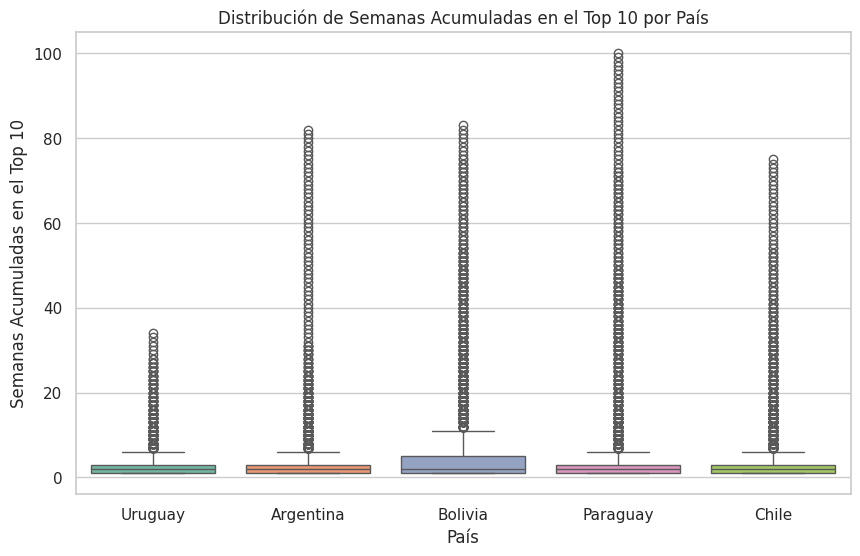

In [15]:
# Boxplot para cumulative_weeks_in_top_10 por país
# Este boxplot muestra la distribución de las semanas acumuladas en el top 10 por país, permitiendo ver si algunos títulos permanecen más tiempo en el top 10 en ciertos países.
plt.figure(figsize=(10, 6))
sns.boxplot(x='country_name', y='cumulative_weeks_in_top_10', data=df, palette='Set2')
plt.title('Distribución de Semanas Acumuladas en el Top 10 por País')
plt.xlabel('País')
plt.ylabel('Semanas Acumuladas en el Top 10')
plt.show()

In [16]:
# Detección de Valores Atípicos en cumulative_weeks_in_top_10
# Cálculo de límites de IQR para 'cumulative_weeks_in_top_10'
Q1 = df['cumulative_weeks_in_top_10'].quantile(0.25)
Q3 = df['cumulative_weeks_in_top_10'].quantile(0.75)
IQR = Q3 - Q1

# Límite superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar valores atípicos
outliers = df[(df['cumulative_weeks_in_top_10'] < lower_bound) | (df['cumulative_weeks_in_top_10'] > upper_bound)]

print("Valores atípicos en 'cumulative_weeks_in_top_10':")
print(outliers[['country_name', 'show_title', 'cumulative_weeks_in_top_10']])

Valores atípicos en 'cumulative_weeks_in_top_10':
      country_name              show_title  cumulative_weeks_in_top_10
14         Uruguay                 Envious                           7
119        Uruguay          Emily in Paris                           7
215        Uruguay            Another Self                           7
238        Uruguay          Desperate Lies                           7
257        Uruguay            Another Self                          11
...            ...                     ...                         ...
17357        Chile            Señora Acero                           8
17371        Chile    Yo soy Betty, la fea                           7
17372        Chile     Pasión de Gavilanes                           7
17374        Chile  Newly Rich, Newly Poor                           7
17375        Chile            Señora Acero                           7

[2070 rows x 3 columns]


<ipython-input-17-efed71f48059>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='cumulative_weeks_in_top_10', data=df, palette='muted')


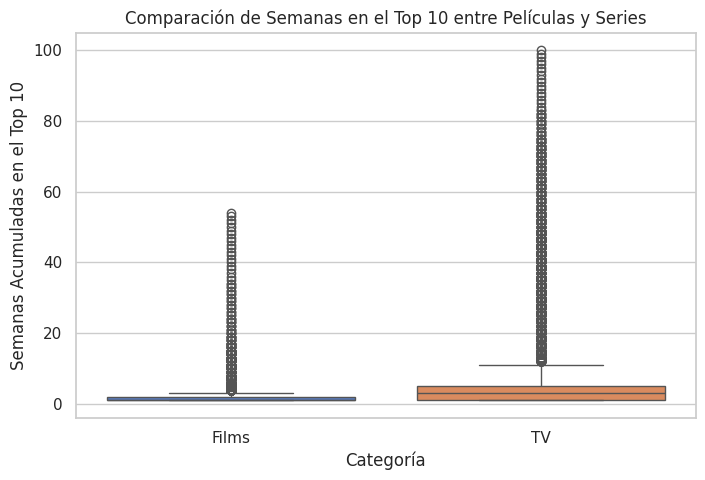

In [17]:
# Este gráfico muestra la diferencia en la duración en el top 10 entre películas y series, permitiéndonos analizar si una categoría tiende a ser más popular por más tiempo.
plt.figure(figsize=(8, 5))
sns.boxplot(x='category', y='cumulative_weeks_in_top_10', data=df, palette='muted')
plt.title('Comparación de Semanas en el Top 10 entre Películas y Series')
plt.xlabel('Categoría')
plt.ylabel('Semanas Acumuladas en el Top 10')
plt.show()



Títulos con más semanas acumuladas en el top 10:
show_title
Pablo Escobar, el patrón del mal    100
Pasión de Gavilanes                  82
Shrek                                54
Yo soy Betty, la fea                 54
Boys Over Flowers                    49
Café con aroma de mujer              47
Sing                                 34
Til Money Do Us Part                 34
The Queen of Flow                    27
True Beauty                          25
Name: cumulative_weeks_in_top_10, dtype: int64


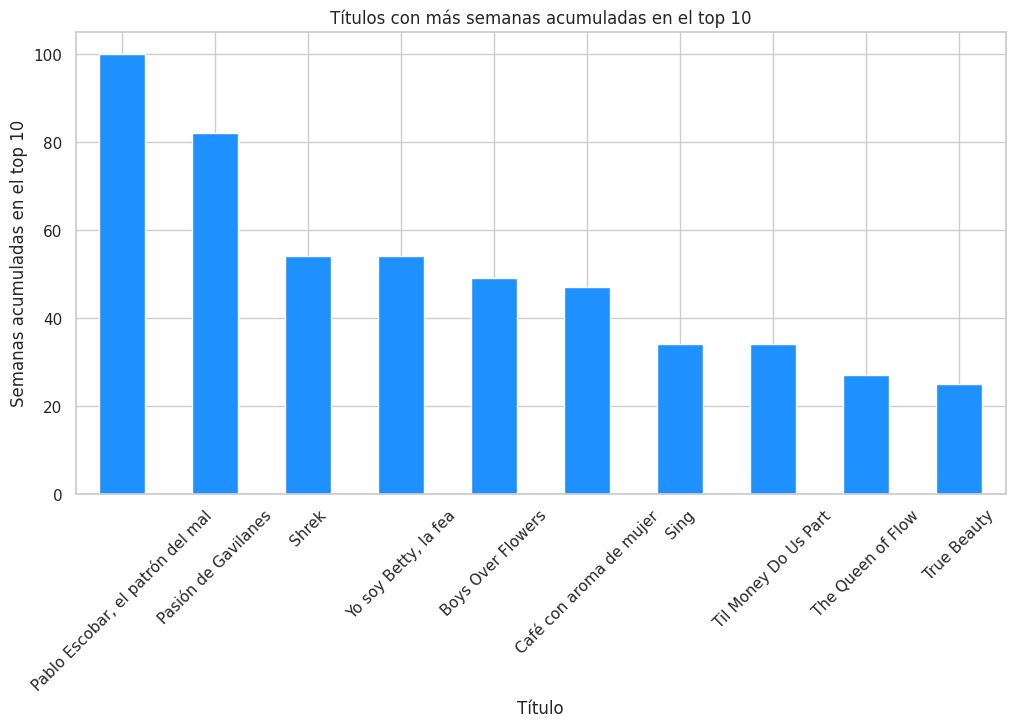

In [9]:
# Análisis de popularidad de títulos (semanas en el top 10)
top_titles = df.groupby('show_title')['cumulative_weeks_in_top_10'].max().sort_values(ascending=False).head(10)
print("\nTítulos con más semanas acumuladas en el top 10:")
print(top_titles)

# Gráfico de barras de los títulos más populares por semanas acumuladas en el top 10
plt.figure(figsize=(12, 6))
top_titles.plot(kind='bar', color='dodgerblue')
plt.title('Títulos con más semanas acumuladas en el top 10')
plt.xlabel('Título')
plt.ylabel('Semanas acumuladas en el top 10')
plt.xticks(rotation=45)
plt.show()

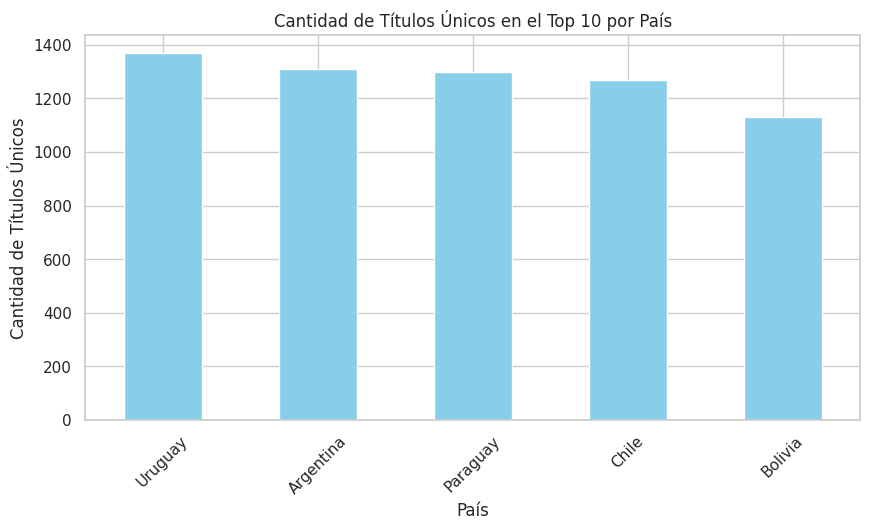

In [11]:
# Número de títulos únicos en el top 10 por país
unique_titles_by_country = df.groupby('country_name')['show_title'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
unique_titles_by_country.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Títulos Únicos en el Top 10 por País')
plt.xlabel('País')
plt.ylabel('Cantidad de Títulos Únicos')
plt.xticks(rotation=45)
plt.show()


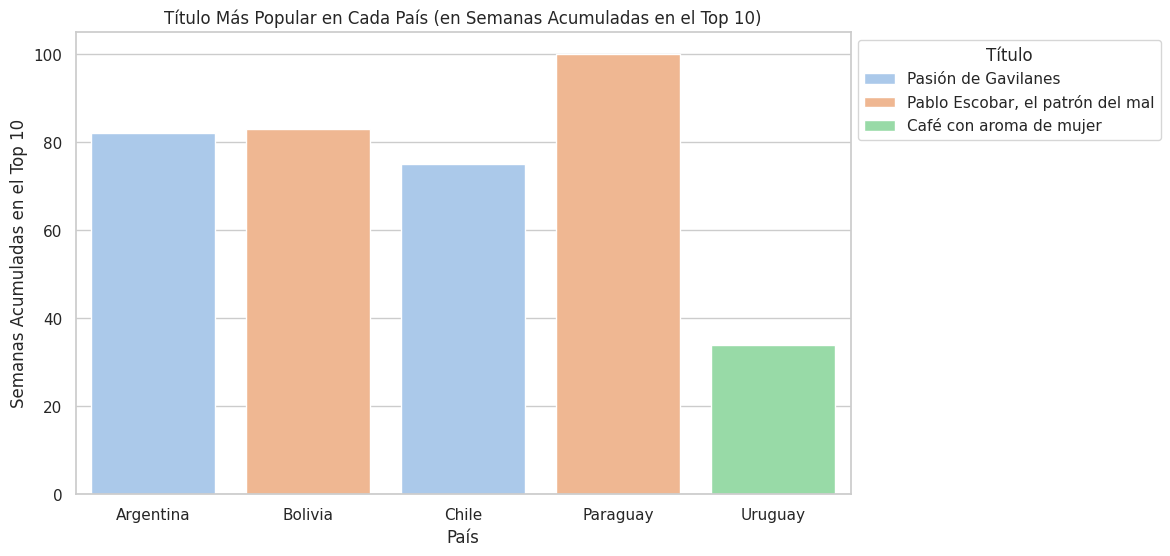

In [12]:
# Título con más semanas en el top 10 por país
top_titles_by_country = df.groupby(['country_name', 'show_title'])['cumulative_weeks_in_top_10'].max().reset_index()
top_titles_by_country = top_titles_by_country.sort_values(['country_name', 'cumulative_weeks_in_top_10'], ascending=[True, False]).groupby('country_name').head(1)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_titles_by_country, x='country_name', y='cumulative_weeks_in_top_10', hue='show_title', dodge=False, palette='pastel')
plt.title('Título Más Popular en Cada País (en Semanas Acumuladas en el Top 10)')
plt.xlabel('País')
plt.ylabel('Semanas Acumuladas en el Top 10')
plt.legend(title='Título', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


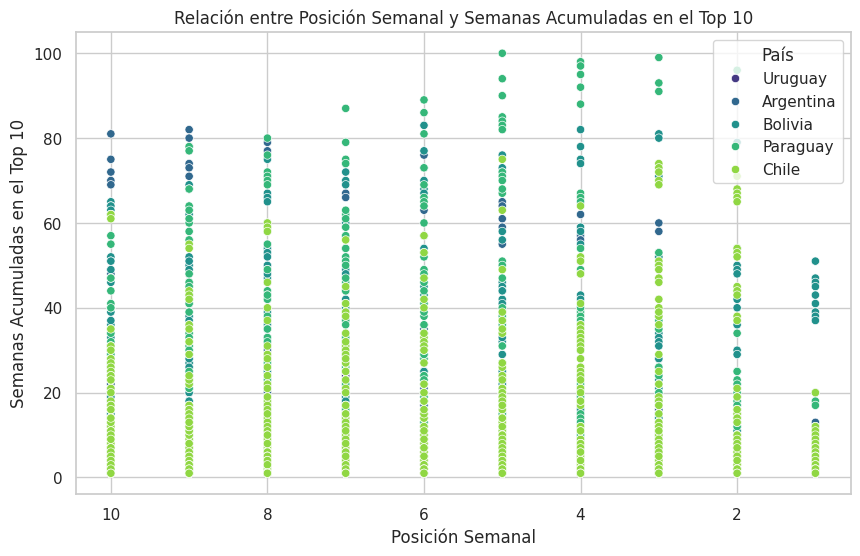

In [14]:
# Scatter plot entre weekly_rank y cumulative_weeks_in_top_10
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weekly_rank', y='cumulative_weeks_in_top_10', hue='country_name', palette='viridis')
plt.title('Relación entre Posición Semanal y Semanas Acumuladas en el Top 10')
plt.xlabel('Posición Semanal')
plt.ylabel('Semanas Acumuladas en el Top 10')
plt.legend(title='País')
plt.gca().invert_xaxis()  # Invertir eje para que 1 esté a la izquierda
plt.show()


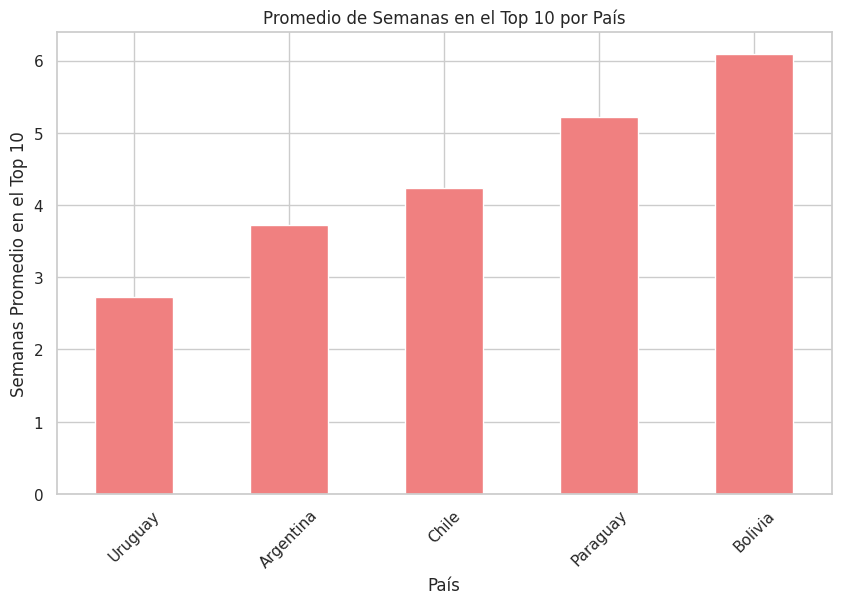

In [16]:
# Promedio de semanas en el top 10 por país
avg_weeks_in_top_10 = df.groupby('country_name')['cumulative_weeks_in_top_10'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_weeks_in_top_10.plot(kind='bar', color='lightcoral')
plt.title('Promedio de Semanas en el Top 10 por País')
plt.xlabel('País')
plt.ylabel('Semanas Promedio en el Top 10')
plt.xticks(rotation=45)
plt.show()


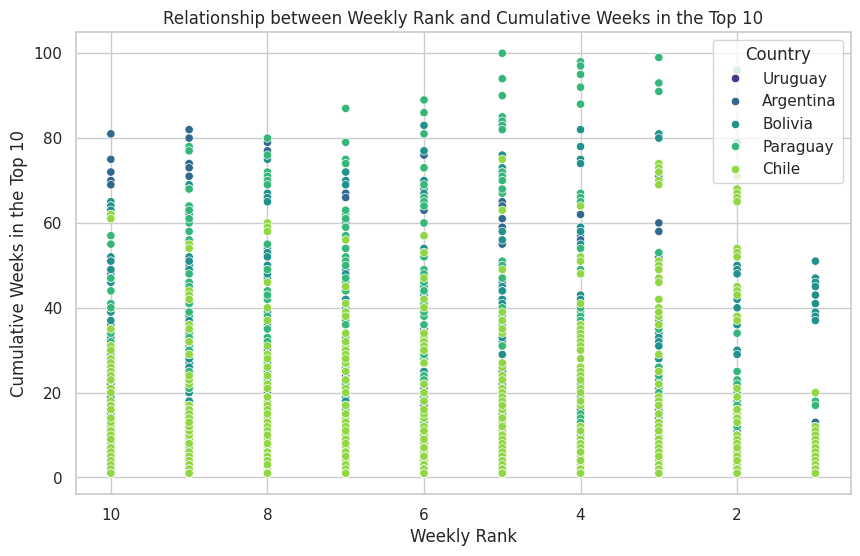

In [22]:
# Scatter plot entre weekly_rank y cumulative_weeks_in_top_10
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weekly_rank', y='cumulative_weeks_in_top_10', hue='country_name', palette='viridis')
plt.title('Relationship between Weekly Rank and Cumulative Weeks in the Top 10')
plt.xlabel('Weekly Rank')
plt.ylabel('Cumulative Weeks in the Top 10')
plt.legend(title='Country')
plt.gca().invert_xaxis()  # Invertir eje para que 1 esté a la izquierda
plt.show()

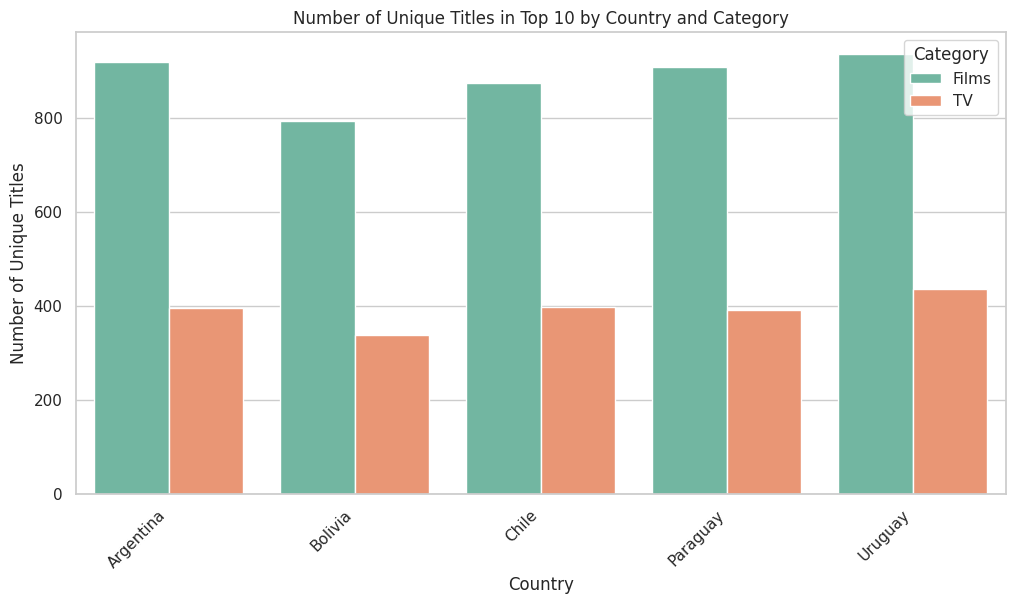

In [21]:
# Group by country and category, count unique titles
country_category_counts = df.groupby(['country_name', 'category'])['show_title'].nunique().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=country_category_counts, x='country_name', y='show_title', hue='category', palette='Set2')
plt.title('Number of Unique Titles in Top 10 by Country and Category')
plt.xlabel('Country')
plt.ylabel('Number of Unique Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.show()